# Image Captioning Demo

In [1]:
import matplotlib.pyplot as plt
import torch

from flamingo_mini import FlamingoModel, FlamingoProcessor
from flamingo_mini.utils import load_url, load_image
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# create model and processor
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
model = FlamingoModel.from_pretrained('flamingo-mimic/checkpoint-260178/')
model.to(device)
model.eval()
processor = FlamingoProcessor(model.config)

FlamingoModel(
  (flamingo): FlamingoGPT2(
    (vision_encoder): CLIPVisionModel(
      (vision_model): CLIPVisionTransformer(
        (embeddings): CLIPVisionEmbeddings(
          (patch_embedding): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
          (position_embedding): Embedding(50, 768)
        )
        (pre_layrnorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (encoder): CLIPEncoder(
          (layers): ModuleList(
            (0-11): 12 x CLIPEncoderLayer(
              (self_attn): CLIPAttention(
                (k_proj): Linear(in_features=768, out_features=768, bias=True)
                (v_proj): Linear(in_features=768, out_features=768, bias=True)
                (q_proj): Linear(in_features=768, out_features=768, bias=True)
                (out_proj): Linear(in_features=768, out_features=768, bias=True)
              )
              (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
              (mlp): CLIPMLP(

FlamingoModel(
  (flamingo): FlamingoGPT2(
    (vision_encoder): CLIPVisionModel(
      (vision_model): CLIPVisionTransformer(
        (embeddings): CLIPVisionEmbeddings(
          (patch_embedding): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
          (position_embedding): Embedding(50, 768)
        )
        (pre_layrnorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (encoder): CLIPEncoder(
          (layers): ModuleList(
            (0-11): 12 x CLIPEncoderLayer(
              (self_attn): CLIPAttention(
                (k_proj): Linear(in_features=768, out_features=768, bias=True)
                (v_proj): Linear(in_features=768, out_features=768, bias=True)
                (q_proj): Linear(in_features=768, out_features=768, bias=True)
                (out_proj): Linear(in_features=768, out_features=768, bias=True)
              )
              (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
              (mlp): CLIPMLP(

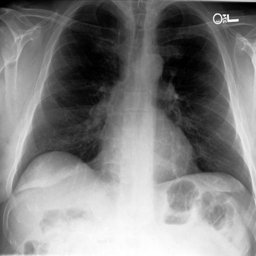

In [14]:
image = load_image('../Stanford_MIT_CHEST/MIMIC-CXR-v2.0/mimic-cxr/dfc90a8a-8c3ddac2-d97b03d5-33d87b92-cba96991.jpg').resize((256,256))
image

# Inference

In [9]:
caption = model.generate_captions(processor, images=[image])
print('generated caption:')
print(caption)

generated caption:
['The lungs are clear without focal consolidation. No pleural effusion or pneumothorax is seen. The cardiac and mediastinal silhouettes are unremarkable. IMPRESSION: No acute cardiopulmonary process.  </s>The cardiac and mediastinal silhouettes are unremarkable.  </s>The lungs are clear without focal consolidation. No pleural effusion or pneumothorax is seen. The cardiac and mediastinal silhouettes are unremarkable.  </s>The lungs are clear without focal consolidation. No pleural effusion or pneumothorax is seen. The cardiac and mediastinal silhouettes are unremarkable.  </s>The lungs are clear without focal consolidation']
